# Review 

Review output data from benchmark tests.

See [README](README.md) for setup instructions.

In [1]:
import pandas as pd  # pip install pandas

GCP_BUCKET = "gs://contrails-301217-benchmark-data"

In [ ]:
# sync data from GCP
# requires google-cloud-sdk (https://cloud.google.com/sdk/docs/install)

# sync flight inputs
!mkdir -p inputs
!gsutil rsync -d -r $GCP_BUCKET/cocip/inputs/flight inputs/flight/

# sync outputs
!mkdir -p outputs
!gsutil rsync -d -r $GCP_BUCKET/cocip/outputs outputs/

## Flight inputs

In [3]:
# load flight metadata
flights_metadata = pd.read_parquet("inputs/flight/flight-metadata.pq")
flights_metadata.set_index("flight_id", inplace=True)

## Flight output

In [4]:
# Load example flight output
flight_example = "200101-20845-UAE345.pq"

In [5]:
flight = pd.read_parquet(f"outputs/flight/{flight_example}")
flight_id = flight["flight_id"][0]

flight.head()

,flight_id,waypoint,thrust,sulphates,rocd,fuel_flow_per_engine,specific_humidity,air_pressure,altitude,so2,...,rf_sw_max,rf_lw_mean,rf_lw_min,rf_lw_max,rf_net_mean,rf_net_min,rf_net_max,cocip,altitude_ft,time_unix
0,200101-20845-UAE345,0,NaN,NaN,2413.750,NaN,NaN,101072.601521,21.0312,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,69.00,1577845657
1,200101-20845-UAE345,1,415741.026515,0.005209,0.000,1.107917,0.012166,94212.833479,609.6000,0.255264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000.00,1577845705
2,200101-20845-UAE345,2,345413.656915,0.005102,0.000,1.085048,0.012136,94212.833479,609.6000,0.249995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000.00,1577845753
3,200101-20845-UAE345,3,609281.296042,0.007274,1528.125,1.856337,0.012102,94212.833479,609.6000,0.356417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000.00,1577845801
4,200101-20845-UAE345,4,579710.112978,0.007407,1528.125,1.890396,0.010009,90748.751663,920.1150,0.362956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3018.75,1577845841


In [6]:
flight.columns

Index(['flight_id', 'waypoint', 'thrust', 'sulphates', 'rocd',
       'fuel_flow_per_engine', 'specific_humidity', 'air_pressure', 'altitude',
       'so2', 'oc', 'co', 'longitude', 'rhi',
       'specific_cloud_ice_water_content', 'cos_a', 'true_airspeed', 'level',
       'sin_a', 'hc', 'tau_cirrus', 'h2o', 'wingspan', 'nox', 'latitude',
       'fuel_flow', 'aircraft_mass', 'engine_efficiency', 'time',
       'air_temperature', 'rho_air', 'segment_length', 'u_wind', 'fuel_burn',
       'v_wind', 'co2', 'nvpm_ei_n', 'G', 'T_sat_liquid', 'rh',
       'rh_critical_sac', 'sac', 'T_critical_sac', 'width', 'depth', 'rhi_1',
       'air_temperature_1', 'specific_humidity_1', 'altitude_1',
       'persistent_1', 'dT_dz', 'ds_dz', 'dz_max', 'rho_air_1', 'iwc_1',
       'n_ice_per_m_1', 'ef', 'contrail_age', 'sdr_mean', 'sdr_min', 'sdr_max',
       'rsr_mean', 'rsr_min', 'rsr_max', 'olr_mean', 'olr_min', 'olr_max',
       'rf_sw_mean', 'rf_sw_min', 'rf_sw_max', 'rf_lw_mean', 'rf_lw_min',
      

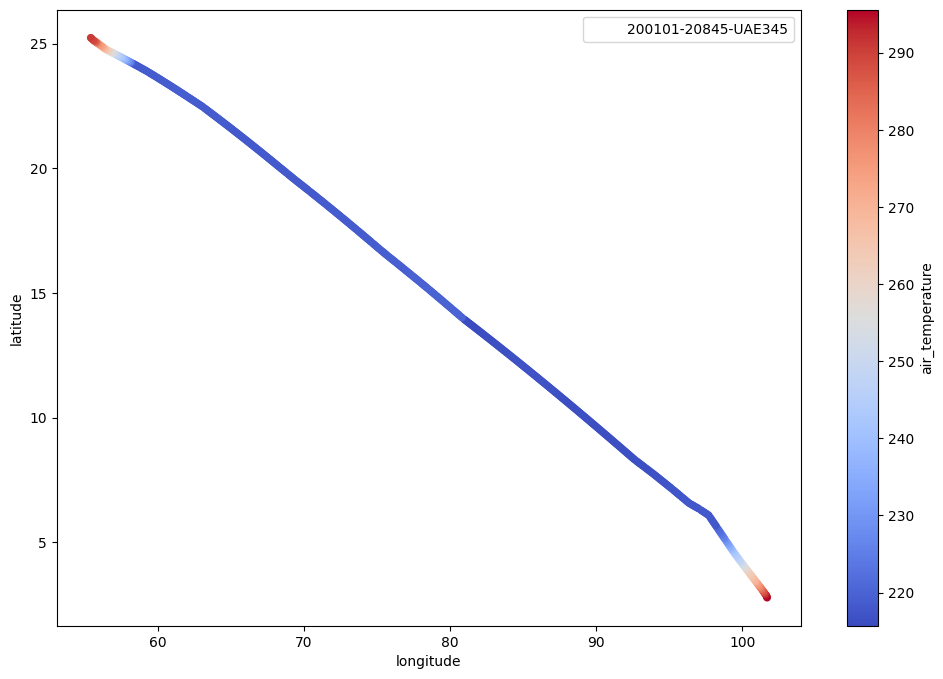

In [14]:
# plot aircraft mass
flight.plot.scatter(
    x="longitude",
    y="latitude",
    c="air_temperature",
    cmap="coolwarm",
    figsize=(12, 8),
    label=flight_id,
);

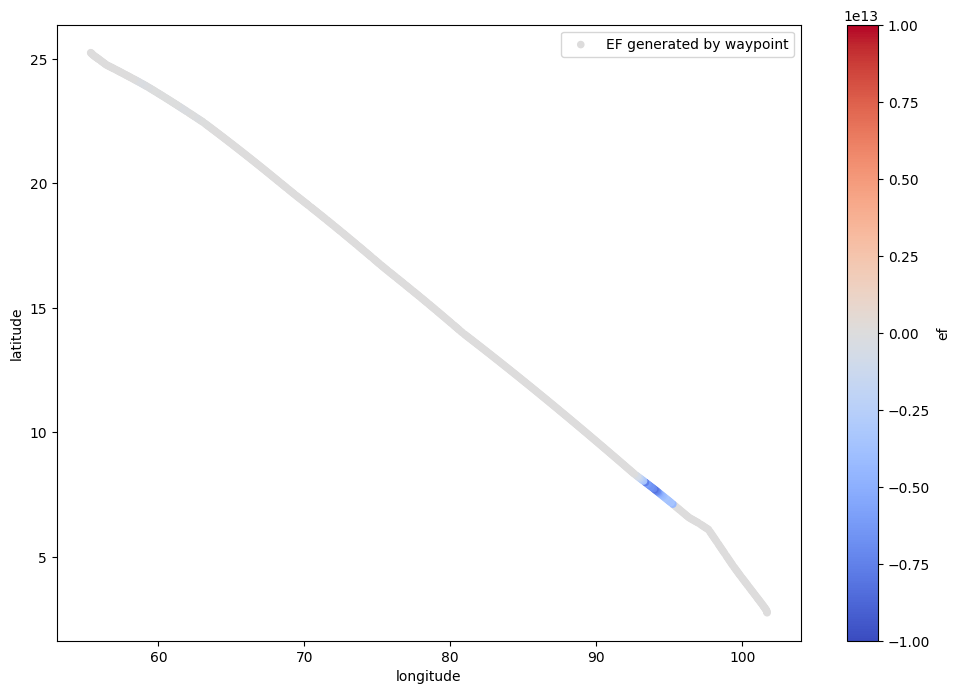

In [7]:
flight.plot.scatter(
    x="longitude",
    y="latitude",
    c="ef",
    cmap="coolwarm",
    figsize=(12, 8),
    vmin=-1e13,
    vmax=1e13,
    label="EF generated by waypoint",
);

In [8]:
# read metadata for flight
flights_metadata.loc[flight_id]

callsign                                                UAE345
icao_address                                            8960EB
flight_number                                            EK345
tail_number                                             A6-EDJ
aircraft_type_icao                                        A388
aircraft_engine_type                                       Jet
origin_airport                                            WMKK
origin_airport_name         Kuala Lumpur International Airport
origin_country                                              MY
destination_airport                                       OMDB
destination_airport_name           Dubai International Airport
destination_country                                         AE
time_first_waypoint                        2020-01-01 02:27:37
time_last_waypoint                         2020-01-01 09:34:08
duration_hours                                            7.11
total_distance_km                                      

## Contrail output

In [15]:
contrail = pd.read_parquet(f"outputs/contrail/{flight_example}")
contrail.head()

,waypoint,flight_id,formation_time,time,age,longitude,latitude,altitude,level,continuous,...,d_heat_rate,rf_sw,rf_lw,rf_net,persistent,ef,timestep,dt_integration,time_unix,formation_time_unix
0,86,200101-20845-UAE345,2020-01-01 03:29:01,2020-01-01 03:30:00,0,95.251264,7.115601,12104.477563,190.142071,0,...,-0.000057,-17.456228,7.687329,-9.768899,1,0.000000e+00,36,300,1577849400,1577849341
1,86,200101-20845-UAE345,2020-01-01 03:29:01,2020-01-01 03:35:00,359,95.247874,7.140778,12136.009615,189.198975,1,...,-0.000084,-16.924623,12.616778,-4.307845,1,-1.455657e+10,37,300,1577849700,1577849341
2,87,200101-20845-UAE345,2020-01-01 03:30:00,2020-01-01 03:35:00,300,95.128682,7.193805,12128.436189,189.425062,1,...,-0.000207,-25.348743,17.206863,-8.141880,1,-1.287425e+10,37,300,1577849700,1577849400
3,88,200101-20845-UAE345,2020-01-01 03:30:40,2020-01-01 03:35:00,260,95.050572,7.227311,12123.324353,189.577816,1,...,-0.000305,-34.244701,23.150066,-11.094635,1,-1.296697e+10,37,300,1577849700,1577849440
4,89,200101-20845-UAE345,2020-01-01 03:31:20,2020-01-01 03:35:00,220,94.972236,7.261058,12118.265025,189.729123,1,...,-0.000375,-40.959236,27.202160,-13.757076,1,-1.120554e+10,37,300,1577849700,1577849480


In [16]:
# contrail data is indexed by timestamp and waypoint
# Note the last waypoint in a continuous contrail segment
# will have 0 values for segment properties (e.g. age, ef, segment_length)
contrail.set_index(["timestep", "waypoint"])

flight_id      formation_time  \
timestep waypoint                                            
36       86        200101-20845-UAE345 2020-01-01 03:29:01   
37       86        200101-20845-UAE345 2020-01-01 03:29:01   
         87        200101-20845-UAE345 2020-01-01 03:30:00   
         88        200101-20845-UAE345 2020-01-01 03:30:40   
         89        200101-20845-UAE345 2020-01-01 03:31:20   
...                                ...                 ...   
128      86        200101-20845-UAE345 2020-01-01 03:29:01   
         87        200101-20845-UAE345 2020-01-01 03:30:00   
129      86        200101-20845-UAE345 2020-01-01 03:29:01   
130      86        200101-20845-UAE345 2020-01-01 03:29:01   
131      86        200101-20845-UAE345 2020-01-01 03:29:01   

                                 time    age  longitude  latitude  \
timestep waypoint                                                   
36       86       2020-01-01 03:30:00      0  95.251264  7.115601   
37       86       2020-01-01 03:35:00    359  95.247874  7.140778   
         87       2020-01-01 03:35:00    300  95.128682  7.193805   
         88       2020-01-01 03:35:00    260  95.050572  7.227311   
         89       2020-01-01 03:35:00    220  94.972236  7.261058   
...                               ...    ...        ...       ...   
128      86       2020-01-01 11:10:00  27659  95.899134  9.470734   
         87       2020-01-01 11:10:00      0  95.843858  9.477083   
129      86       2020-01-01 11:15:00      0  95.913246  9.499670   
130      86       2020-01-01 11:20:00      0  95.927327  9.528841   
131      86       2020-01-01 11:25:00      0  95.941386  9.558227   

                       altitude       level  continuous  segment_length  ...  \
timestep waypoint                                                        ...   
36       86        12104.477563  190.142071           0        0.000000  ...   
37       86        12136.009615  189.198975           1    14412.008427  ...   
         87        12128.436189  189.425062           1     9388.026070  ...   
         88        12123.324353  189.577816           1     9421.026544  ...   
         89        12118.265025  189.729123           1     9455.212511  ...   
...                         ...         ...         ...             ...  ...   
128      86        11879.216503  197.017582           1     6103.811038  ...   
         87        11901.780132  196.317827           0        0.000000  ...   
129      86        11880.321464  196.983256           0     6090.623209  ...   
130      86        11878.808912  197.030245           0        0.000000  ...   
131      86        11881.771121  196.938232           0        0.000000  ...   

                      heat_rate   d_heat_rate      rf_sw      rf_lw  \
timestep waypoint                                                     
36       86        9.128913e-06 -5.667356e-05 -17.456228   7.687329   
37       86        1.376411e-05 -8.438302e-05 -16.924623  12.616778   
         87        2.825592e-05 -2.073150e-04 -25.348743  17.206863   
         88        3.813284e-05 -3.046355e-04 -34.244701  23.150066   
         89        4.420108e-05 -3.748469e-04 -40.959236  27.202160   
...                         ...           ...        ...        ...   
128      86        4.673915e-10 -5.103567e-07   0.000000   0.177018   
         87        1.060520e-09 -8.767716e-07   0.000000   0.332588   
129      86        6.097647e-10 -7.597042e-07   0.000000   0.258667   
130      86        8.381461e-10 -2.362873e-07   0.000000   0.101417   
131      86        1.256822e-09 -1.027896e-06   0.000000   0.360306   

                      rf_net  persistent            ef  dt_integration  \
timestep waypoint                                                        
36       86        -9.768899           1  0.000000e+00             300   
37       86        -4.307845           1 -1.455657e+10             300   
         87        -8.141880           1 -1.287425e+10         

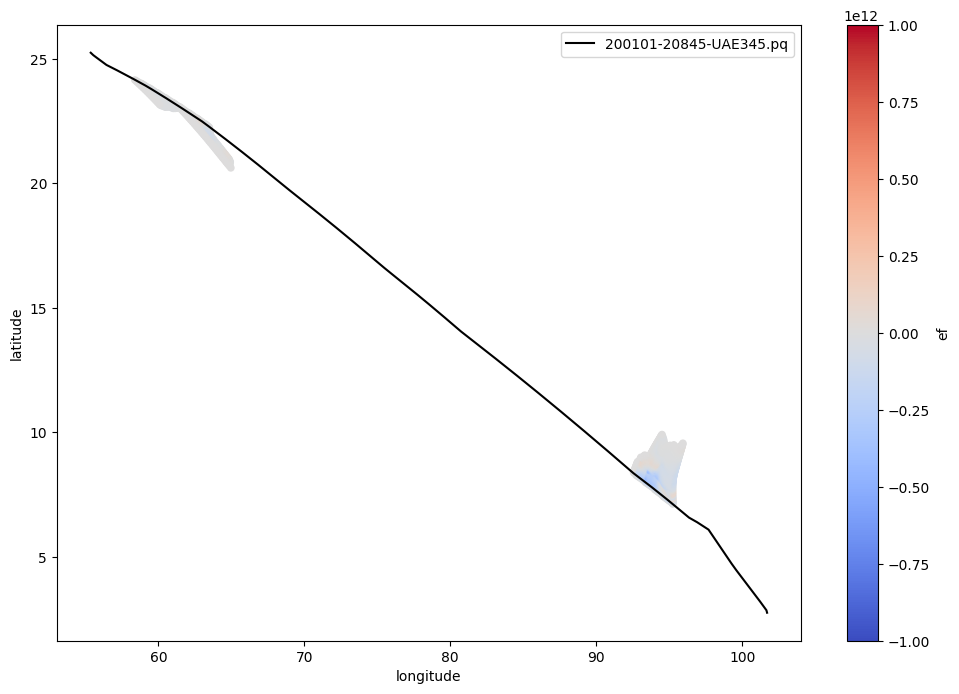

In [17]:
ax = flight.plot("longitude", "latitude", color="k", figsize=(12, 8), label=f"{flight_example}")
contrail.plot.scatter(
    "longitude", "latitude", c="ef", cmap="coolwarm", vmin=-1e12, vmax=1e12, ax=ax
);